In [1]:
%matplotlib inline
from pycocotools.coco import COCO
from pycocoevalcap.eval import COCOEvalCap
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io
import pylab

import json
from json import encoder
encoder.FLOAT_REPR = lambda o: format(o, '.3f')

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:962: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:962: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))


In [2]:
# set up file names and pathes
dataDir='/home/ubuntu/obj2text-neuraltalk2/coco-caption/coco-caption'
dataType='val2014'
algName = ['object_only_original', 'area_and_perimeter', 'area_and_width', 'perimeter_and_width', 'beam_width_5_area_and_per']
annFile='%s/annotations/captions_%s.json'%(dataDir,dataType)

### Model Performance and Word Counts Comparisons

In [3]:
# set up file names and pathes
dataDir='/home/ubuntu/obj2text-neuraltalk2/coco-caption/coco-caption'
dataType='val2014'
algName = ['object_only_original', 
           'area_and_perimeter', 
           'area_and_width',
           'perimeter_and_width',
           'CNN_and_objects_original',
           'CNN_and_objects_with_area_and_width',
           'beam_width_5_original', 
           'beam_width_5_area_and_per']
annFile='%s/annotations/captions_%s.json'%(dataDir,dataType)

In [4]:
### resFile
model_resFile_dict = {}

for model in algName:
    with open('/home/ubuntu/obj2text-neuraltalk2/project_results/%s.json'%(model), 'r') as f:
        results_unfiltered = json.load(f)                
    results = results_unfiltered['val_predictions']
    # save to file so that coco.loadRes works without error
    with open('/home/ubuntu/obj2text-neuraltalk2/project_results/filtered/filtered_%s.json'%(model), 'w') as f:
        json.dump(results, f)
    model_resFile_dict[model] = '/home/ubuntu/obj2text-neuraltalk2/project_results/filtered/filtered_%s.json'%(model)

In [5]:
### cocoRes
# create coco object and cocoRes objects
coco = COCO(annFile)

model_cocoRes_dict = {}

for model in algName:
    model_cocoRes_dict[model] = coco.loadRes(model_resFile_dict[model])

loading annotations into memory...
0:00:00.773297
creating index...
index created!
Loading and preparing results...     
DONE (t=0.05s)
creating index...
index created!
Loading and preparing results...     
DONE (t=0.04s)
creating index...
index created!
Loading and preparing results...     
DONE (t=0.04s)
creating index...
index created!
Loading and preparing results...     
DONE (t=0.05s)
creating index...
index created!
Loading and preparing results...     
DONE (t=0.04s)
creating index...
index created!
Loading and preparing results...     
DONE (t=0.04s)
creating index...
index created!
Loading and preparing results...     
DONE (t=0.04s)
creating index...
index created!
Loading and preparing results...     
DONE (t=0.05s)
creating index...
index created!


In [6]:
### cocoEval
model_cocoEval_dict = {}

for model in algName:
    print model
    model_cocoEval_dict[model] = COCOEvalCap(coco, model_cocoRes_dict[model])
    model_cocoEval_dict[model].params['image_id'] = model_cocoRes_dict[model].getImgIds()
    # evaluate results
    model_cocoEval_dict[model].evaluate()
    print ''

object_only_original
tokenization...
setting up scorers...
computing Bleu score...
{'reflen': 30802, 'guess': [31106, 27906, 24706, 21506], 'testlen': 31106, 'correct': [21051, 10159, 4344, 1871]}
ratio: 1.00986948899
Bleu_1: 0.677
Bleu_2: 0.496
Bleu_3: 0.351
Bleu_4: 0.248
computing METEOR score...
METEOR: 0.227
computing Rouge score...
ROUGE_L: 0.496
computing CIDEr score...
CIDEr: 0.832

area_and_perimeter
tokenization...
setting up scorers...
computing Bleu score...
{'reflen': 31160, 'guess': [31584, 28384, 25184, 21984], 'testlen': 31584, 'correct': [21253, 10138, 4283, 1813]}
ratio: 1.0136071887
Bleu_1: 0.673
Bleu_2: 0.490
Bleu_3: 0.344
Bleu_4: 0.241
computing METEOR score...
METEOR: 0.226
computing Rouge score...
ROUGE_L: 0.494
computing CIDEr score...
CIDEr: 0.813

area_and_width
tokenization...
setting up scorers...
computing Bleu score...
{'reflen': 31063, 'guess': [31408, 28208, 25008, 21808], 'testlen': 31408, 'correct': [21225, 10174, 4338, 1896]}
ratio: 1.01110646106
Bleu_

CNN_and_objects_with_area_and_width
CIDEr: 0.858
Bleu_4: 0.261
Bleu_3: 0.364
Bleu_2: 0.509
Bleu_1: 0.687
ROUGE_L: 0.504
METEOR: 0.232

perimeter_and_width
CIDEr: 0.820
Bleu_4: 0.241
Bleu_3: 0.344
Bleu_2: 0.491
Bleu_1: 0.674
ROUGE_L: 0.493
METEOR: 0.227

area_and_perimeter
CIDEr: 0.813
Bleu_4: 0.241
Bleu_3: 0.344
Bleu_2: 0.490
Bleu_1: 0.673
ROUGE_L: 0.494
METEOR: 0.226

CNN_and_objects_original
CIDEr: 0.865
Bleu_4: 0.260
Bleu_3: 0.365
Bleu_2: 0.512
Bleu_1: 0.691
ROUGE_L: 0.507
METEOR: 0.234

beam_width_5_area_and_per
CIDEr: 0.847
Bleu_4: 0.265
Bleu_3: 0.360
Bleu_2: 0.496
Bleu_1: 0.676
ROUGE_L: 0.500
METEOR: 0.230

object_only_original
CIDEr: 0.832
Bleu_4: 0.248
Bleu_3: 0.351
Bleu_2: 0.496
Bleu_1: 0.677
ROUGE_L: 0.496
METEOR: 0.227

area_and_width
CIDEr: 0.817
Bleu_4: 0.246
Bleu_3: 0.348
Bleu_2: 0.494
Bleu_1: 0.676
ROUGE_L: 0.495
METEOR: 0.226

beam_width_5_original
CIDEr: 0.870
Bleu_4: 0.273
Bleu_3: 0.368
Bleu_2: 0.504
Bleu_1: 0.681
ROUGE_L: 0.502
METEOR: 0.232



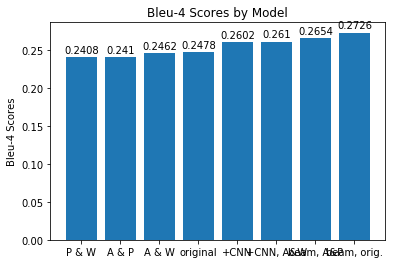

In [7]:
bleu_4 = {}

# print output evaluation scores
for model in model_cocoEval_dict:
    print model
    for metric, score in model_cocoEval_dict[model].eval.items():
        print '%s: %.3f'%(metric, score)
        if metric == "Bleu_4":
            bleu_4[model] = score
    print ''
    
sorted_models = sorted(bleu_4, key=bleu_4.__getitem__)
vals = [bleu_4[w] for w in sorted_models]

ind = np.arange(len(bleu_4))  # the x locations for the groups
#width = 0.60  # the width of the bars

fig, ax = plt.subplots()
rects = ax.bar(ind, vals)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Bleu-4 Scores')
ax.set_title('Bleu-4 Scores by Model')
ax.set_xticks(ind)
ax.set_xticklabels(['P & W', 'A & P', 'A & W', 'original', '+CNN',
                   '+CNN, A&W', 'beam, A&P', 'beam, orig.'])
#plt.xticks(rotation=90)

def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    xpos = xpos.lower()  # normalize the case of the parameter
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0.5, 'right': 0.57, 'left': 0.43}  # x_txt = x + w*off

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()*offset[xpos], 1.01*height,
                '{}'.format(round(height, 4)), ha=ha[xpos], va='bottom')


autolabel(rects)

plt.show()


In [8]:
# Get comparative word counts from the models

test_words = {'behind': 0, 'front': 0, 'back': 0, 'background': 0, 'bigger': 0, 'larger': 0,
              'baby': 0, 'big': 0, 'short': 0, 'small': 0, 'tall': 0, 'large': 0}

model_word_counts_dict = {}

for model in model_cocoRes_dict:
    model_word_counts_dict[model] = test_words.copy()
    for key, value in model_cocoRes_dict[model].anns.iteritems():
        for word in test_words.keys():
            if word in value['caption']:
                model_word_counts_dict[model][word] += 1
    print model_word_counts_dict[model]

{'short': 1, 'big': 4, 'larger': 0, 'back': 109, 'large': 89, 'baby': 18, 'behind': 2, 'background': 71, 'tall': 18, 'front': 109, 'small': 7, 'bigger': 4}
{'short': 4, 'big': 2, 'larger': 1, 'back': 120, 'large': 132, 'baby': 17, 'behind': 0, 'background': 85, 'tall': 14, 'front': 109, 'small': 6, 'bigger': 2}
{'short': 9, 'big': 0, 'larger': 2, 'back': 147, 'large': 121, 'baby': 14, 'behind': 1, 'background': 110, 'tall': 19, 'front': 125, 'small': 7, 'bigger': 0}
{'short': 3, 'big': 0, 'larger': 2, 'back': 133, 'large': 114, 'baby': 19, 'behind': 0, 'background': 90, 'tall': 11, 'front': 108, 'small': 7, 'bigger': 0}
{'short': 0, 'big': 0, 'larger': 0, 'back': 62, 'large': 68, 'baby': 9, 'behind': 0, 'background': 9, 'tall': 5, 'front': 73, 'small': 14, 'bigger': 0}
{'short': 3, 'big': 0, 'larger': 3, 'back': 116, 'large': 109, 'baby': 15, 'behind': 1, 'background': 80, 'tall': 11, 'front': 143, 'small': 11, 'bigger': 0}
{'short': 4, 'big': 2, 'larger': 0, 'back': 82, 'large': 111, 

In [9]:
word_count_averages = test_words.copy()
for key, value in word_count_averages.iteritems():
    word_count_averages[key] = np.mean([model_word_counts_dict[model][key] for model in model_word_counts_dict])
        
sorted_word_count_averages = sorted(word_count_averages, key=word_count_averages.__getitem__)

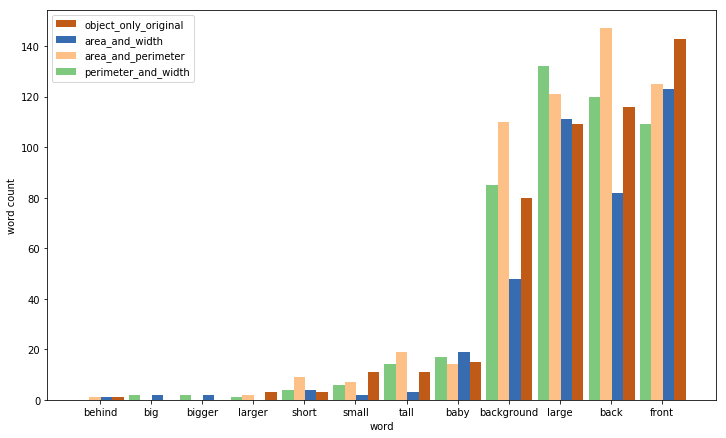

In [10]:
pylab.rcParams['figure.figsize'] = (10.0, 6.0)

# Plot word counts by model
# word_counts = [object_only_original_word_counts, area_and_perimeter_word_counts, area_and_width_word_counts,
#               perimeter_and_width_word_counts, beam_width_5_area_and_per_word_counts]

fig = plt.figure()
ax = fig.add_subplot(111)

space = 0.1

words = sorted_word_count_averages

models = ['perimeter_and_width','area_and_perimeter','area_and_width','object_only_original']

n = len(models)

width = (1 - space) / (len(models))
#print "width:", width

for i, model in enumerate(models):
    #print ''
    #print "model:", model
    counts = model_word_counts_dict[model]
    #print "counts:", counts
    vals = [counts[w] for w in sorted_word_count_averages]
    pos = [j - (.75 - space) / 2. + i * width for j in range(0,len(words))]
    #print pos
    ax.bar(pos, vals, width=width, label=model, color=plt.cm.Accent(float(i) / n))
    
#ax.set_xticks(words)
#ax.set_xticklabels(words)
#plt.setp(plt.xticks(), rotation=90)

plt.xticks(range(len(words)), words)

#print(plt.xticks())

plt.tight_layout()

ax.set_ylabel("word count")
ax.set_xlabel("word")

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1])

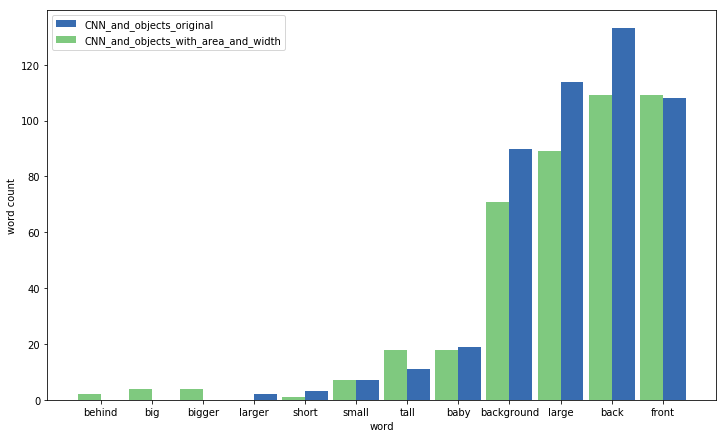

In [11]:
pylab.rcParams['figure.figsize'] = (10.0, 6.0)

fig = plt.figure()
ax = fig.add_subplot(111)

space = 0.1

words = sorted_word_count_averages

models = ['CNN_and_objects_with_area_and_width', 'CNN_and_objects_original']

n = len(models)

width = (1 - space) / (len(models))
#print "width:", width

for i, model in enumerate(models):
    #print ''
    #print "model:", model
    counts = model_word_counts_dict[model]
    #print "counts:", counts
    vals = [counts[w] for w in sorted_word_count_averages]
    pos = [j - (.55 - space) / 2. + i * width for j in range(0,len(words))]
    #print pos
    ax.bar(pos, vals, width=width, label=model, color=plt.cm.Accent(float(i) / n))
    
#ax.set_xticks(words)
#ax.set_xticklabels(words)
#plt.setp(plt.xticks(), rotation=90)

plt.xticks(range(len(words)), words)

#print(plt.xticks())

plt.tight_layout()

ax.set_ylabel("word count")
ax.set_xlabel("word")

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1])

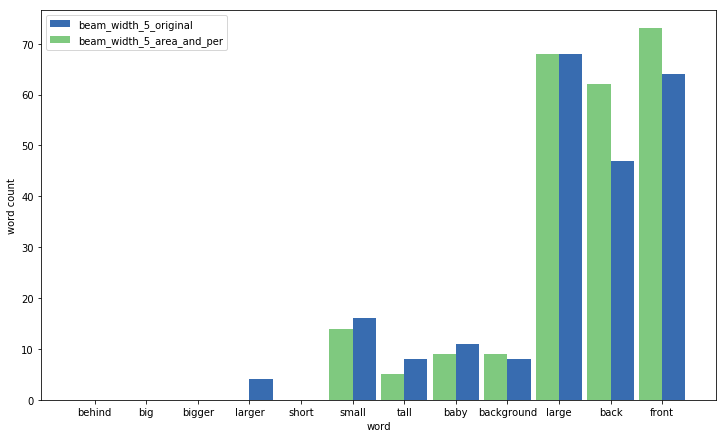

In [12]:
pylab.rcParams['figure.figsize'] = (10.0, 6.0)

fig = plt.figure()
ax = fig.add_subplot(111)

space = 0.1

words = sorted_word_count_averages

models = ['beam_width_5_area_and_per', 'beam_width_5_original']

n = len(models)

width = (1 - space) / (len(models))
#print "width:", width

for i, model in enumerate(models):
    #print ''
    #print "model:", model
    counts = model_word_counts_dict[model]
    #print "counts:", counts
    vals = [counts[w] for w in sorted_word_count_averages]
    pos = [j - (.55 - space) / 2. + i * width for j in range(0,len(words))]
    #print pos
    ax.bar(pos, vals, width=width, label=model, color=plt.cm.Accent(float(i) / n))
    
#ax.set_xticks(words)
#ax.set_xticklabels(words)
#plt.setp(plt.xticks(), rotation=90)

plt.xticks(range(len(words)), words)

#print(plt.xticks())

plt.tight_layout()

ax.set_ylabel("word count")
ax.set_xlabel("word")

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1])

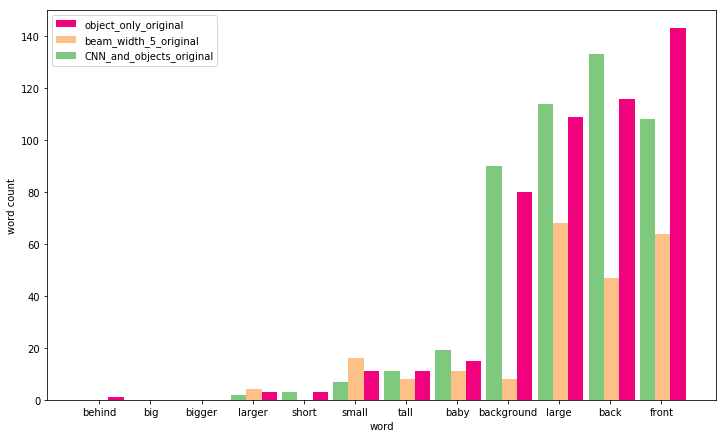

In [13]:
pylab.rcParams['figure.figsize'] = (10.0, 6.0)

fig = plt.figure()
ax = fig.add_subplot(111)

space = 0.1

words = sorted_word_count_averages

models = ['CNN_and_objects_original', 'beam_width_5_original', 'object_only_original']

n = len(models)

width = (1 - space) / (len(models))
#print "width:", width

for i, model in enumerate(models):
    #print ''
    #print "model:", model
    counts = model_word_counts_dict[model]
    #print "counts:", counts
    vals = [counts[w] for w in sorted_word_count_averages]
    pos = [j - (.65 - space) / 2. + i * width for j in range(0,len(words))]
    #print pos
    ax.bar(pos, vals, width=width, label=model, color=plt.cm.Accent(float(i) / n))
    
#ax.set_xticks(words)
#ax.set_xticklabels(words)
#plt.setp(plt.xticks(), rotation=90)

plt.xticks(range(len(words)), words)

#print(plt.xticks())

plt.tight_layout()

ax.set_ylabel("word count")
ax.set_xlabel("word")

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1])

### Investigate actual images and captions

In [14]:
# get all images with repeat objects
with open('/home/ubuntu/obj2text-neuraltalk2/coco/coco_yolo_objname_location.json', 'r') as f:
        coco_yolo_objname_location = json.load(f)

ids_w_multiple_of_a_cat = []        
        
for element in coco_yolo_objname_location:
    # test for repeats- below evaluates to True if there are repeats
    if len(element["full_categories"]) != len(set(element["full_categories"])):
        ids_w_multiple_of_a_cat.append(element["id"])

In [15]:
potentially_interesting_images = []

for new_value, old_value in zip(model_cocoRes_dict["area_and_perimeter"].anns.itervalues(), model_cocoRes_dict["object_only_original"].anns.itervalues()):
    if new_value['image_id'] in ids_w_multiple_of_a_cat:
        for word in test_words.keys():
            if (word in new_value['caption']) and (word not in old_value['caption']):
                potentially_interesting_images.append(new_value['image_id'])
                
print(len(potentially_interesting_images))

242


image ID: 562805


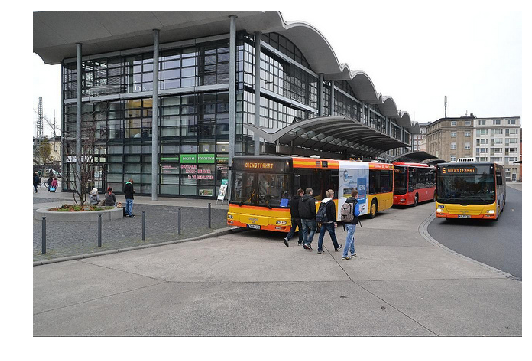

ground truth captions:
A modern transportation building with busses lined up for passengers.
A bus station with buses and people nearby. 
Buses parked at a bus stop while unloading passengers.
A bus depot with buses parked in front. 
some people buildings and three different buses and a tree

object_only_original :
a group of people standing on a street next to a bus

area_and_perimeter :
a bus is driving down the street with a bus behind it

area_and_width :
a group of people standing on a street with a bus

perimeter_and_width :
a bus is parked on the side of the road

CNN_and_objects_original :
a group of people standing on a city street

CNN_and_objects_with_area_and_width :
a bus is driving down the street with people walking

beam_width_5_original :
a group of people standing in a parking lot

beam_width_5_area_and_per :
a couple of buses that are sitting in the street

image ID: 221222


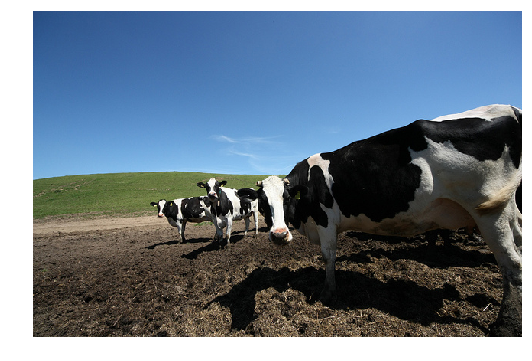

ground truth captions:
a herd of cows stand on some tiled dirt 
A few cows standing in the dirt near each other.
Three cows in a dirt field looking at the camera.
A group of cows hanging out in the muddy part of a field
a bunch of cows that are standing in a field

object_only_original :
a herd of cattle grazing on a lush green field

area_and_perimeter :
a cow standing in a field with a bunch of cows in the background

area_and_width :
a cow standing in a field with a bunch of other animals in the background

perimeter_and_width :
a cow is standing in a field with a bunch of cows

CNN_and_objects_original :
a cow standing in a field with a group of cows

CNN_and_objects_with_area_and_width :
a herd of cattle grazing on a lush green field

beam_width_5_original :

beam_width_5_area_and_per :

image ID: 559195


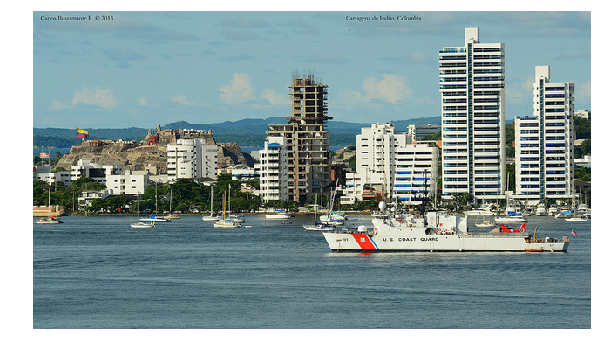

ground truth captions:
a white boat is in front of a city on the water
A boat cruising in front of waterfront skyscrapers.
A white military boat floating across a large body of water.
A white ship sailing past an urban area.
A Coast Guard boat going down a body of river in front of some buildings.

object_only_original :
a boat is docked in the water near a pier

area_and_perimeter :
a boat is docked in a lake with a boat in the background

area_and_width :
a boat is docked in the water near a large city

perimeter_and_width :
a boat is docked in the water near a dock

CNN_and_objects_original :
a boat is traveling down the river near a city

CNN_and_objects_with_area_and_width :
a boat is docked in the water near a dock

beam_width_5_original :
a small boat in a large body of water

beam_width_5_area_and_per :
a small boat in a body of water

image ID: 198178


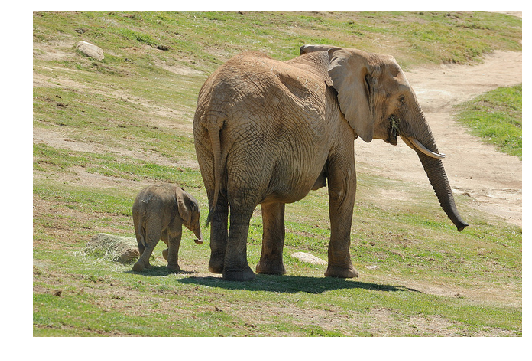

ground truth captions:
A large elephant standing next to a small elephant.
An adult and baby elephant walking beside each other.
Adult elephant with young walking in grassy area.
And elephant walks with its baby elephant. 
A big and a small elephant out in the sun 

object_only_original :
a large elephant standing next to a tree

area_and_perimeter :
a large elephant standing next to a baby elephant

area_and_width :
a large elephant standing next to a baby elephant

perimeter_and_width :
a large elephant standing next to a baby elephant

CNN_and_objects_original :
a couple of elephants standing next to each other

CNN_and_objects_with_area_and_width :
a baby elephant standing next to a bigger elephant

beam_width_5_original :
an elephant standing in the middle of a field

beam_width_5_area_and_per :
a large elephant standing next to a baby elephant

image ID: 454444


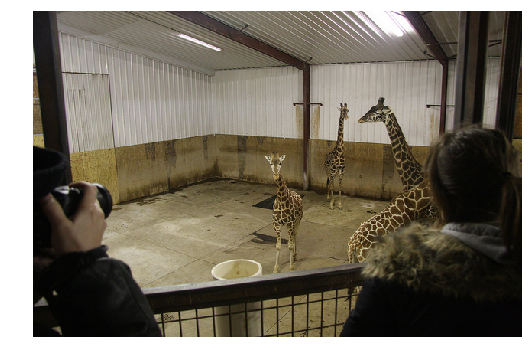

ground truth captions:
A group of three giraffe standing inside of a cage.
The three giraffes are being kept indoors for being to see. 
Three giraffes in an indoor enclosure being photographed by visitors.
A group of zebras in a glass room with people taking pictures.
A man seems to be taking shots of four Zebras. 

object_only_original :
a man is standing next to a giraffe

area_and_perimeter :
a man and a woman are standing in front of a giraffe

area_and_width :
a man is feeding a giraffe with a giraffe

perimeter_and_width :
a man and a woman are standing in front of a giraffe

CNN_and_objects_original :
a giraffe is standing next to a group of people

CNN_and_objects_with_area_and_width :
a man and woman feeding a giraffe in a zoo

beam_width_5_original :
a man is standing next to two giraffes

beam_width_5_area_and_per :
a group of people standing around a giraffe

image ID: 504726


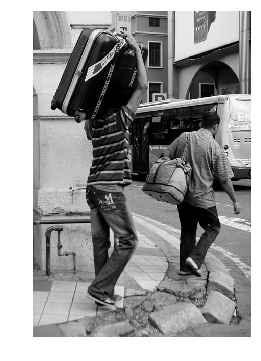

ground truth captions:
Two men with bags walking towards a bus.
A black and white photo of two men carrying luggage.
Two men walk on the sidewalk carrying luggage bags. 
Two people with luggage walking toward a bus.
Men carrying heavy suitcases in old fashioned photo.

object_only_original :
two people standing next to a bus stop

area_and_perimeter :
a man and woman standing in front of a truck

area_and_width :
a man and woman are walking down the street

perimeter_and_width :
two men standing next to a bus with a man in the background

CNN_and_objects_original :
a group of people standing next to a red bus

CNN_and_objects_with_area_and_width :
a man and woman standing in front of a bus

beam_width_5_original :
a couple of people that are standing in the street

beam_width_5_area_and_per :
a couple of people that are standing in the street

image ID: 46185


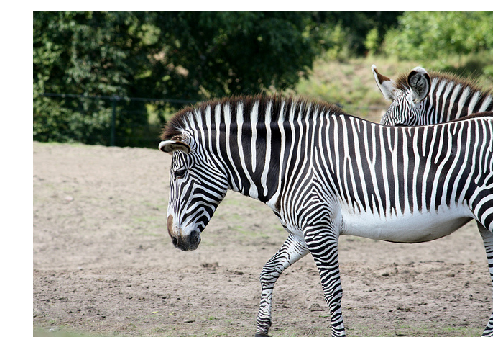

ground truth captions:
two zebras are walking in a field next to some plants
A couple of zebra standing next to each other.
A zebra looking downward walking through a field.
A zebra is standing alone by itself. 
Two zebras walking in dirt while fenced in. 

object_only_original :
a couple of zebras are standing in a field

area_and_perimeter :
a zebra standing next to a baby zebra in a field

area_and_width :
a group of zebras standing in a field

perimeter_and_width :
a couple of zebras standing in a field

CNN_and_objects_original :
a group of zebras standing in a field

CNN_and_objects_with_area_and_width :
a group of zebras standing in a field

beam_width_5_original :

beam_width_5_area_and_per :

image ID: 204536


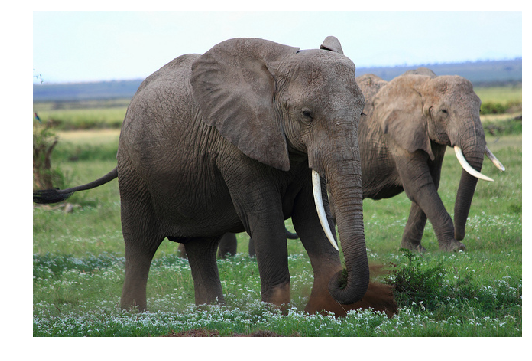

ground truth captions:
Two elephant walking, the one in the foreground kicking up a some dirt. 
Two elephants walk around in a large grassy field. 
two elephants with long walking through the grass
An elephant kicking some dirt on the ground.
two very big elephants walking in the wild 

object_only_original :
two elephants standing in a field with trees in the background

area_and_perimeter :
a baby elephant standing next to a larger elephant

area_and_width :
two elephants are standing in a field of grass

perimeter_and_width :
a couple of elephants standing next to each other

CNN_and_objects_original :
a baby elephant is standing in the dirt

CNN_and_objects_with_area_and_width :
two elephants are standing in the grass near a tree

beam_width_5_original :

beam_width_5_area_and_per :

image ID: 322307


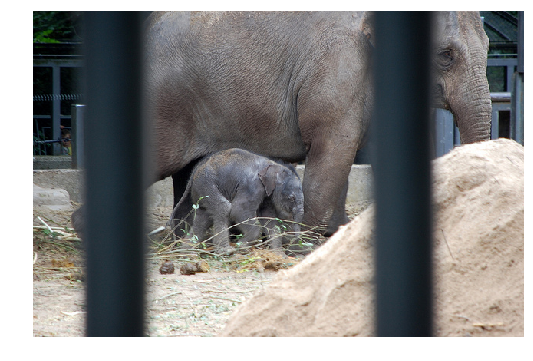

ground truth captions:
A mama elephant standing next to a baby elephant in a cage at a zoo.
An elephant in a cage with its baby.
a baby elephant and a large elephant standing near one another
A ELEPHANT IS WALKING NEXT TO ITS BABY CUTIE!
The baby elephant stays close to its mother.

object_only_original :
two elephants are standing in a field of grass

area_and_perimeter :
a baby elephant standing next to a larger elephant

area_and_width :
two elephants are standing in a field of grass

perimeter_and_width :
a baby elephant standing next to a larger elephant

CNN_and_objects_original :
a baby elephant is standing in front of a larger elephant

CNN_and_objects_with_area_and_width :
a baby elephant standing next to a bigger elephant

beam_width_5_original :
a couple of elephants standing next to each other

beam_width_5_area_and_per :
a large elephant standing next to a baby elephant

image ID: 490860


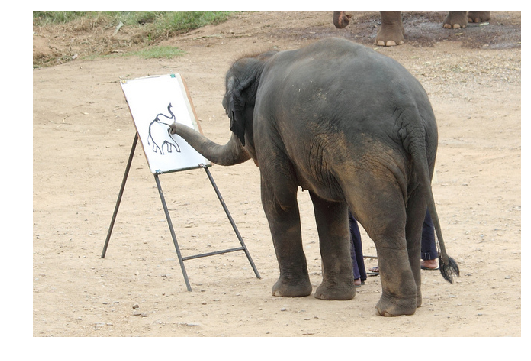

ground truth captions:
A baby elephant panting on a white canvas.
A baby elephant is painting a picture with it's trunk. 
An elephant is standing in the dirt drawing on an easel with its trunk.
An elephant touching a drawing on an easel with his trunk.
An elephant drawing a picture with it's trunk.

object_only_original :
a couple of elephants standing next to each other

area_and_perimeter :
a large elephant standing next to a baby elephant

area_and_width :
a baby elephant standing next to a baby elephant

perimeter_and_width :
a baby elephant standing next to a bigger elephant

CNN_and_objects_original :
a group of elephants standing in a field

CNN_and_objects_with_area_and_width :
a couple of elephants standing next to each other

beam_width_5_original :
a couple of elephants standing next to each other

beam_width_5_area_and_per :
a large elephant standing next to a baby elephant

image ID: 92034


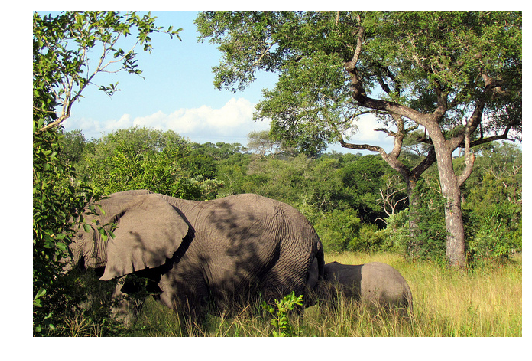

ground truth captions:
An adult and baby elephant grazing in the green grass.
A big elephant and a small elephant walking through a grassy meadow.
Elephants are in the tall knee high shaded grass.
A mama elephant walking next to a baby elephant.
A large and small elephant in tall grass next to trees and bushes.

object_only_original :
a couple of elephants standing in a field

area_and_perimeter :
a large elephant standing in a field with a baby elephant in the background

area_and_width :
a large elephant standing next to a baby elephant

perimeter_and_width :
a baby elephant walking in the dirt near a baby elephant

CNN_and_objects_original :
two elephants walking in the grass near a tree

CNN_and_objects_with_area_and_width :
a couple of elephants standing next to each other

beam_width_5_original :

beam_width_5_area_and_per :



In [26]:
interesting_images = [562805, 221222, 559195, 198178, 454444, 504726, 46185, 204536,
                     322307, 490860, 92034]

# show interesting images
for i in range(len(interesting_images)):
    imgId = interesting_images[i]
    print 'image ID:', imgId
    img = coco.loadImgs(imgId)[0]
    I = io.imread('/home/ubuntu/obj2text-neuraltalk2/coco/images/%s/%s'%(dataType,img['file_name']))
    plt.imshow(I)
    plt.axis('off')
    plt.show()
    
    print 'ground truth captions:'
    annIds = coco.getAnnIds(imgIds=imgId)
    anns = coco.loadAnns(annIds)
    coco.showAnns(anns)
    print ''
    
    for model in algName:
        print model, ":"
        annIds = model_cocoRes_dict[model].getAnnIds(imgIds=imgId)
        anns = model_cocoRes_dict[model].loadAnns(annIds)
        coco.showAnns(anns)
        print ''